# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import timedelta
from datetime import datetime
from scipy import stats


# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

    

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 579


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
#url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key
units = "metric"


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

start_time = datetime.now()
delay = start_time + timedelta(minutes=1)
# Loop through all the cities in our list to fetch weather data


for i, city in enumerate(cities):
    now = datetime.now()  
    # Group cities in sets of 50 for logging purposes
    if (i % 60 == 0 and i >= 60 and (now < delay)):
        print(f"TIMER: {(now - start_time).total_seconds()}")
        print(f"SLEEP: {(delay - now).total_seconds()}")
        time.sleep((delay - now).seconds)
        start_time = datetime.now()
        delay = start_time + timedelta(minutes=1)
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
    #city_url = url + "&q=" + city
    print("endpoint", city_url)
   
   
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
            

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                            "Lat": city_lat, 
                            "Lng": city_lng, 
                            "Max Temp": city_max_temp,
                            "Humidity": city_humidity,
                            "Cloudiness": city_clouds,
                            "Wind Speed": city_wind,
                            "Country": city_country,
                            "Date": city_date})

    # If an error is experienced, skip the city
    except:
        
        print("City not found. Skipping...")
        pass
    #break     
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
endpoint http://api.openweathermap.org/data/2.5/weather?appid=de0893f1009f568b6ef15045f5681a57&units=metric&q=arraial do cabo
Processing Record 1 of Set 1 | arraial do cabo
endpoint http://api.openweathermap.org/data/2.5/weather?appid=de0893f1009f568b6ef15045f5681a57&units=metric&q=pangody
Processing Record 2 of Set 1 | pangody
endpoint http://api.openweathermap.org/data/2.5/weather?appid=de0893f1009f568b6ef15045f5681a57&units=metric&q=trecase
Processing Record 3 of Set 1 | trecase
endpoint http://api.openweathermap.org/data/2.5/weather?appid=de0893f1009f568b6ef15045f5681a57&units=metric&q=port-aux-francais
Processing Record 4 of Set 1 | port-aux-francais
endpoint http://api.openweathermap.org/data/2.5/weather?appid=de0893f1009f568b6ef15045f5681a57&units=metric&q=den burg
Processing Record 5 of Set 1 | den burg
endpoint http://api.openweathermap.org/data/2.5/weather?appid=de0893f1009f568b6ef15045f5681a57&units=metric&q=grytvik

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
print(city_data_df.count())

City          559
Lat           559
Lng           559
Max Temp      559
Humidity      559
Cloudiness    559
Wind Speed    559
Country       559
Date          559
dtype: int64


In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,arraial do cabo,-22.9661,-42.0278,22.11,76,0,3.01,BR,1720074432
1,pangody,65.8500,74.4859,22.92,50,47,2.91,RU,1720074432
2,trecase,40.7694,14.4377,23.15,73,0,1.54,IT,1720074432
3,port-aux-francais,-49.3500,70.2167,1.01,60,18,4.16,TF,1720074433
4,den burg,53.0542,4.7972,15.54,67,45,9.26,NL,1720074433


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,arraial do cabo,-22.9661,-42.0278,22.11,76,0,3.01,BR,1720074432
1,pangody,65.8500,74.4859,22.92,50,47,2.91,RU,1720074432
2,trecase,40.7694,14.4377,23.15,73,0,1.54,IT,1720074432
3,port-aux-francais,-49.3500,70.2167,1.01,60,18,4.16,TF,1720074433
4,den burg,53.0542,4.7972,15.54,67,45,9.26,NL,1720074433


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

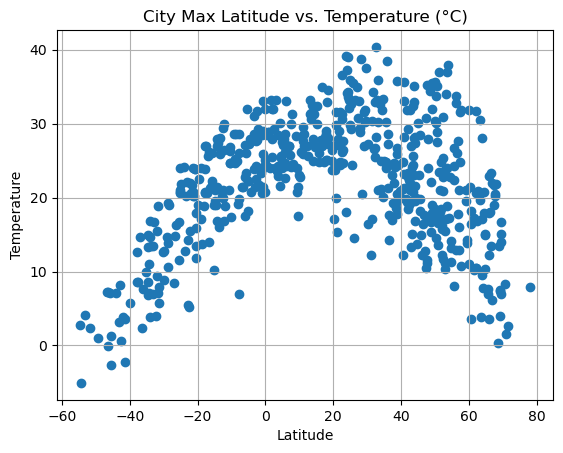

In [10]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values,y_values)


# Incorporate the other graph properties
plt.title(f'City Max Latitude vs. Temperature (°C)')
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig1.png")

plt.show()

#### Latitude Vs. Humidity

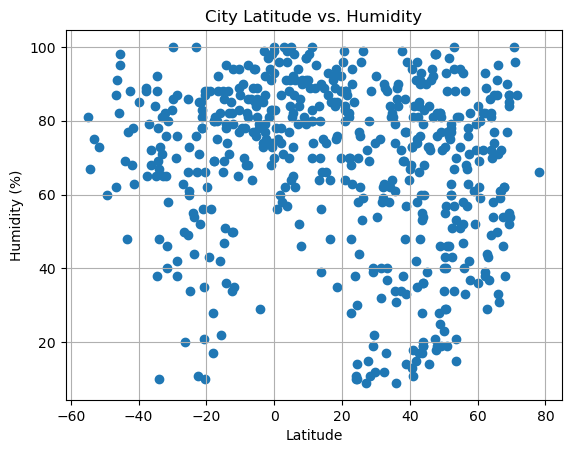

In [11]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values,y_values)


# Incorporate the other graph properties
plt.title(f'City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)



# Save the figure
plt.savefig("output_data/Fig2.png")

plt.show()

#### Latitude Vs. Cloudiness

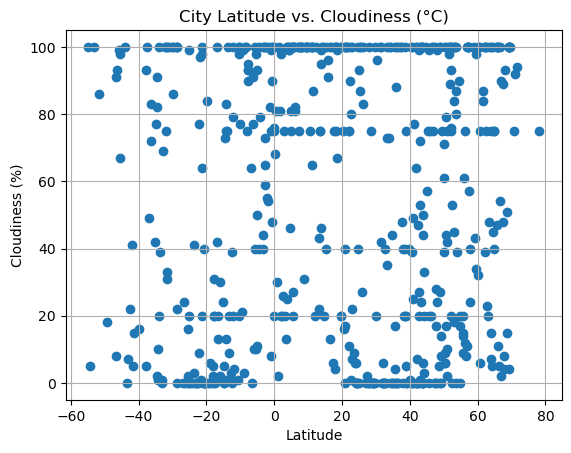

In [12]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values,y_values)


# Incorporate the other graph properties
plt.title(f'City Latitude vs. Cloudiness (°C)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

plt.show()

#### Latitude vs. Wind Speed Plot

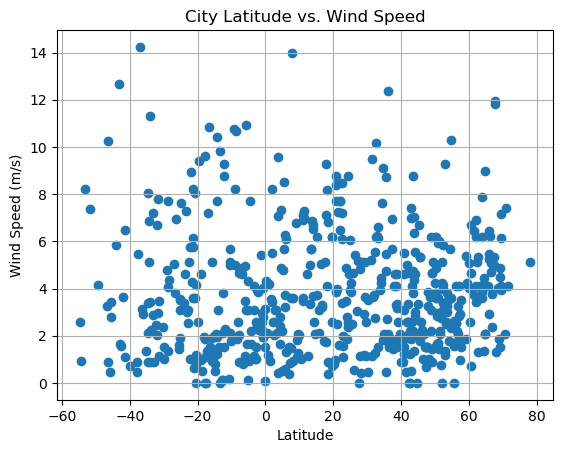

In [13]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values,y_values)


# Incorporate the other graph properties
plt.title(f'City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)



# Save the figure
plt.savefig("output_data/Fig4.png")

plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

City_ID
0      3.730762
1      3.759105
2      3.751101
3      3.722342
4      3.755021
         ...   
554    3.739639
555    3.750375
556    3.753254
557    3.751138
558    3.752628
Name: Lat, Length: 559, dtype: float64


In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,pangody,65.8500,74.4859,22.92,50,47,2.91,RU,1720074432
2,trecase,40.7694,14.4377,23.15,73,0,1.54,IT,1720074432
4,den burg,53.0542,4.7972,15.54,67,45,9.26,NL,1720074433
9,thompson,55.7435,-97.8558,8.09,93,20,0.00,CA,1720074434
10,muar,2.0442,102.5689,32.02,78,98,3.43,MY,1720074363


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,arraial do cabo,-22.9661,-42.0278,22.11,76,0,3.01,BR,1720074432
3,port-aux-francais,-49.3500,70.2167,1.01,60,18,4.16,TF,1720074433
5,grytviken,-54.2811,-36.5092,-5.06,67,5,0.92,GS,1720074433
6,lagunas,-5.2269,-75.6753,22.25,84,10,0.12,PE,1720074433
7,waitangi,-43.9535,-176.5597,7.12,69,100,5.83,NZ,1720074433


###  Temperature vs. Latitude Linear Regression Plot

y = -0.21x +31.27
The r^2-value is: 0.2686553757188404


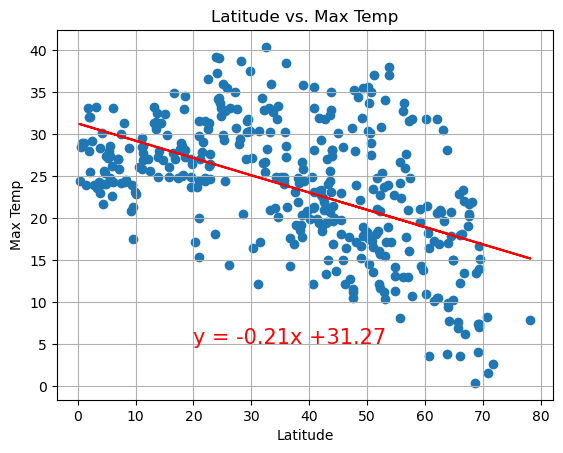

In [24]:
# Linear regression on Northern Hemisphere



# latitude and max temperature for Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

  
# Calculate regression line
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

regress_values = slope * x_values + intercept
#print(regress_values)


# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)


# Plot scatter plot
#plt.figure(figsize=(10, 6))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
    
# Add labels and title
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Latitude vs. Max Temp")
plt.annotate(line_eq,(20,5),fontsize=15,color="red")
plt.grid(True)

 # Print r value
print(f"The r^2-value is: {rvalue**2}")

# Show plot
plt.show()



y = 0.51x +28.16
The r^2-value is: 0.6914171375086376


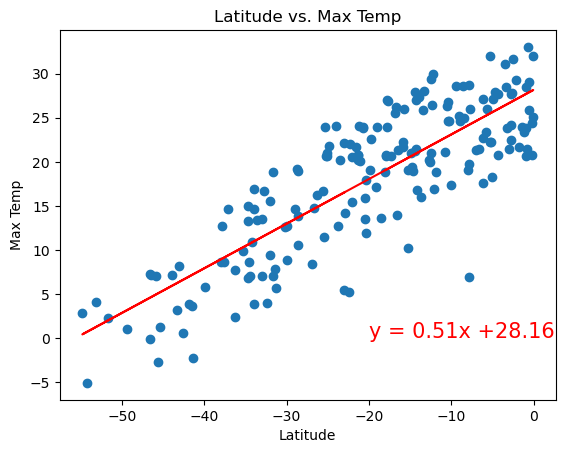

In [25]:
# Linear regression on Southern Hemisphere

# latitude and max temperature for Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

  
# Calculate regression line
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

regress_values = slope * x_values + intercept
#print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)


# Plot scatter plot
#plt.figure(figsize=(10, 6))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
    
# Add labels and title
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Latitude vs. Max Temp")
plt.annotate(line_eq,(-20,0),fontsize=15,color="red")
#plt.grid(True)

 # Print r value
print(f"The r^2-value is: {rvalue**2}")

# Show plot
plt.show()



**Discussion about the linear relationship:** For the Northern Hemisphere there is a negative relationship between latitude and max temperature, as the latitude increases, maximum temperature decreases, for the souther hemisphere the realationship is positive but for both of them as we move further away from the Equator (closer to the poles) the temperature decreases. 
The r^2 (NH .41 and SH .64) indicates that while latitude is an important factor, there is a 40-60%  of variance due to other variables that need to be considered

### Humidity vs. Latitude Linear Regression Plot

y = -0.24x + 75.22
The r^2-value is: 0.039219383310595615


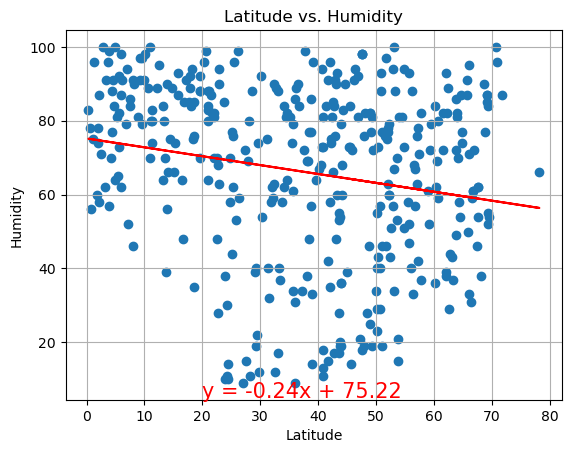

In [26]:
# Northern Hemisphere



# latitude and max temperature for Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

  
# Calculate regression line
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

regress_values = slope * x_values + intercept
#print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

# Plot scatter plot
#plt.figure(figsize=(10, 6))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
    
# Add labels and title
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs. Humidity")
plt.annotate(line_eq,(20,5),fontsize=15,color="red")
plt.grid(True)

 # Print r value
print(f"The r^2-value is: {rvalue**2}")

# Show plot
plt.show()


y = 0.23x +76.52
The r^2-value is: 0.026572347430637928


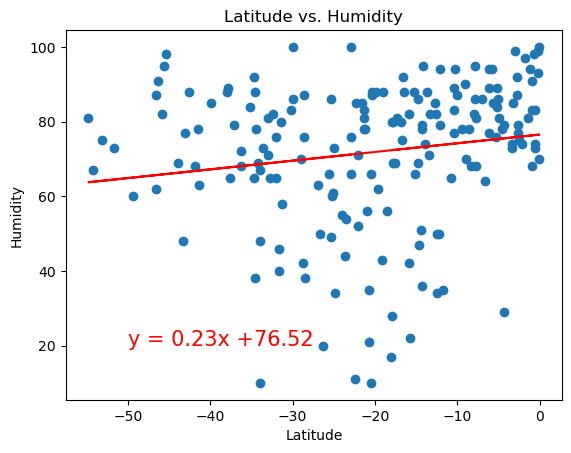

In [27]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

  
# Calculate regression line
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

regress_values = slope * x_values + intercept
#print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)


# Plot scatter plot
#plt.figure(figsize=(10, 6))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
    
# Add labels and title
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs. Humidity")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
#plt.grid(True)

 # Print r value
print(f"The r^2-value is: {rvalue**2}")

# Show plot
plt.show()


**Discussion about the linear relationship:**  The changes in humidity due to latitud are minimal, because the r^2 values in both the Northern and Southern Hemisphere is so low, this indicates that the latitud has almos no impact on the humidity. Humidity variability is due to other variables. 

### Cloudiness vs. Latitude Linear Regression Plot

y = -0.19x + 63.12
The r^2-value is: 0.008621942120757285


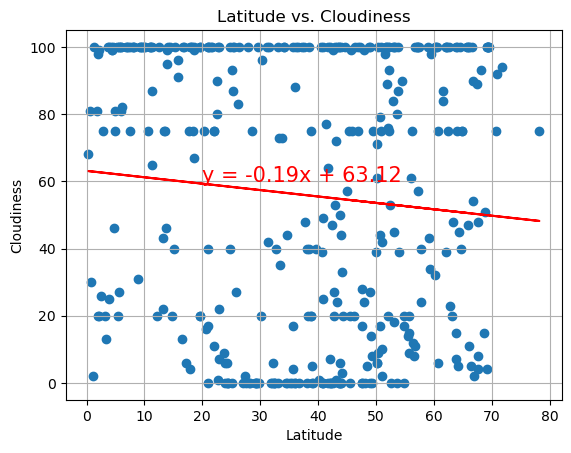

In [28]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

  
# Calculate regression line
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

regress_values = slope * x_values + intercept
#print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

# Plot scatter plot
#plt.figure(figsize=(10, 6))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
    
# Add labels and title
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs. Cloudiness")
plt.annotate(line_eq,(20,60),fontsize=15,color="red")
plt.grid(True)

 # Print r value
print(f"The r^2-value is: {rvalue**2}")

# Show plot
plt.show()



y = 0.29x + 53.41
The r^2 -value is: 0.009643226598653845


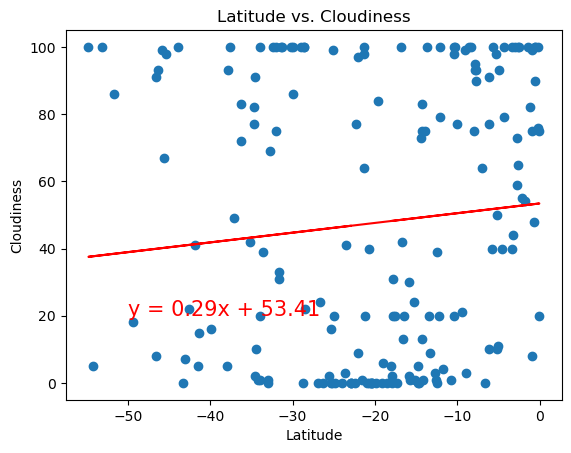

In [29]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

  
# Calculate regression line
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

regress_values = slope * x_values + intercept
#print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)


# Plot scatter plot
#plt.figure(figsize=(10, 6))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
    
# Add labels and title
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs. Cloudiness")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
#plt.grid(True)

 # Print r value
print(f"The r^2 -value is: {rvalue**2}")

# Show plot
plt.show()


**Discussion about the linear relationship:** The changes in cloudiness due to latitud are minimal, because the r^2 values in both the Northern and Southern Hemisphere is so low, this indicates that the latitud has almos no impact on the cloudiness. Cloudiness variability is due to other factors. 

### Wind Speed vs. Latitude Linear Regression Plot

y = 0.0x +3.79
The r^2-value is: 3.721905335693716e-07


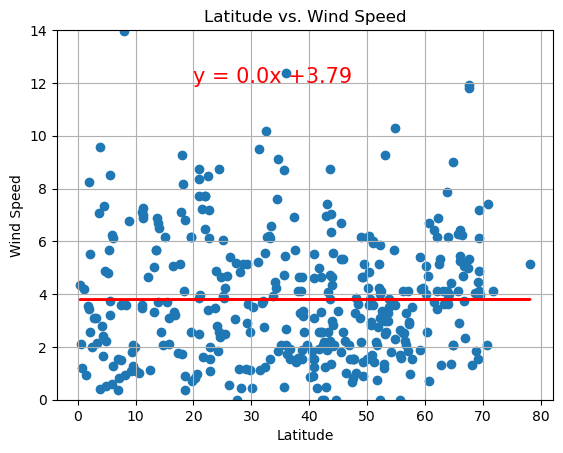

In [30]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

# Calculate regression line
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

regress_values = slope * x_values + intercept
#print(regress_values)
  
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Plot scatter plot
#plt.figure(figsize=(10, 6))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
    
# Add labels and title
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs. Wind Speed")
plt.annotate(line_eq,(20,12),fontsize=15,color="red")
plt.grid(True)
plt.ylim(0, 14) 

 # Print r value
print(f"The r^2-value is: {rvalue**2}")

# Show plot
plt.show()



y = -0.03x + 3.09
The r^2-value is: 0.016078417656003336


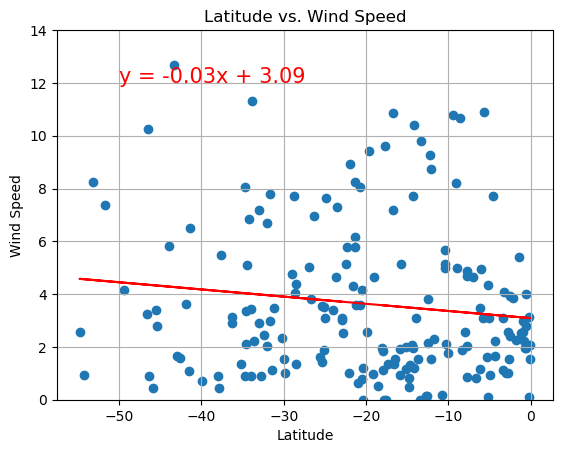

In [31]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

  
# Calculate regression line
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

regress_values = slope * x_values + intercept
#print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

# Plot scatter plot
#plt.figure(figsize=(10, 6))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
    
# Add labels and title
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs. Wind Speed")
plt.annotate(line_eq,(-50,12),fontsize=15,color="red")
plt.grid(True)
plt.ylim(0, 14) 

 # Print r value
print(f"The r^2-value is: {rvalue**2}")

# Show plot
plt.show()


**Discussion about the linear relationship:** Northern Hemisphere: Minimal decrease in wind speed with increasing latitude, with latitude explaining only 0.23% of the variance.
Southern Hemisphere: Slight decrease in wind speed with increasing latitude, with latitude explaining 4.33% of the variance.
Overall, latitude is not a significant factor in predicting wind speed, and other factors should be considered for a more comprehensive understanding.





